- Check the datasets available in seaborn library (sns.get_dataset_names())
- Load titanic data
- The task is to classify passenger based on their survival
- Prepare the data
- Feature Selection
- What are the models that you are going to use?
- Hyperparameters tuning for your models
- What are the results?
- Should Jack Dawson survive?

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# features selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# split

from sklearn.model_selection import train_test_split

In [348]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [349]:
titanic = sns.load_dataset('titanic')

### EDA 

In [350]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [351]:
titanic.shape

(891, 15)

In [352]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [353]:
# Creating two list for object columns and for numerical columns

strings2 = ['sex', 'embarked', 'class','who','adult_male', 'deck', 'embark_town', 'alive', 'alone']
numeric2 = [ 'survived','pclass','age', 'sibsp', 'parch', 'fare']

In [354]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [355]:
# filling missing values by mean and mode (numercial and categorical respectively)

for s in strings2:
    mode = titanic[s].mode()[0]
    titanic[s]= titanic[s].fillna(mode)
    titanic[s][titanic[s] == 'nan'] = mode
    
for n in numeric2:
    median = titanic[n].median()
    titanic[n]= titanic[n].fillna(median)

/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_1722/1747405737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[s][titanic[s] == 'nan'] = mode
/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_1722/1747405737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[s][titanic[s] == 'nan'] = mode
/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_1722/1747405737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [356]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [357]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [358]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [359]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic['sex_encode']=encoder.fit_transform(titanic['sex'])
titanic['embarked_encode']=encoder.fit_transform(titanic['embarked'])
titanic['class_encode']=encoder.fit_transform(titanic['class'])
titanic['gender_encode']=encoder.fit_transform(titanic['who'])
titanic['adult_male_encode']=encoder.fit_transform(titanic['adult_male'])
titanic['deck_encode']=encoder.fit_transform(titanic['deck'])
titanic['embark_town_encode']=encoder.fit_transform(titanic['embark_town'])
titanic['alive_encode']=encoder.fit_transform(titanic['alive'])
titanic['alone_encode']=encoder.fit_transform(titanic['alone'])

In [360]:
del titanic['sex']
del titanic['embarked']
del titanic['class']
del titanic['who']
del titanic['adult_male']
del titanic['deck']
del titanic['embark_town']
del titanic['alive']
del titanic['alone']
del titanic['alive_encode']
del titanic['class_encode']
del titanic['embark_town_encode']
del titanic['adult_male_encode']

In [361]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,sex_encode,embarked_encode,gender_encode,deck_encode,alone_encode
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,-0.167675,0.325753,0.089095,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.162098,-0.196793,0.022584,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.018754,0.350163,-0.042536,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,0.068230,-0.136003,0.004008,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,0.039798,-0.055682,0.022493,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.224719,0.146290,-0.101230,-0.271832
sex_encode,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,0.108262,-0.639773,-0.078556,0.303646
embarked_encode,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,0.108262,1.000000,-0.064154,0.100166,0.063532
gender_encode,0.325753,-0.196793,0.350163,-0.136003,-0.055682,0.146290,-0.639773,-0.064154,1.000000,0.021915,0.006540
deck_encode,0.089095,0.022584,-0.042536,0.004008,0.022493,-0.101230,-0.078556,0.100166,0.021915,1.000000,-0.075497


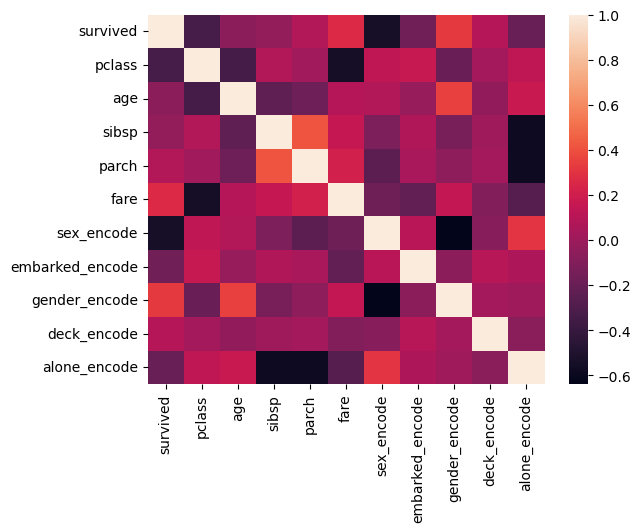

In [362]:
sns.heatmap(titanic.corr());

# Features selection

In [363]:
x = titanic.drop('survived', axis = 1)
y = titanic['survived']

In [364]:
x

,pclass,age,sibsp,parch,fare,sex_encode,embarked_encode,gender_encode,deck_encode,alone_encode
0,3,22.0,1,0,7.2500,1,2,1,2,0
1,1,38.0,1,0,71.2833,0,0,2,2,0
2,3,26.0,0,0,7.9250,0,2,2,2,1
3,1,35.0,1,0,53.1000,0,2,2,2,0
4,3,35.0,0,0,8.0500,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,2,1,2,1
887,1,19.0,0,0,30.0000,0,2,2,1,1
888,3,28.0,1,2,23.4500,0,2,2,2,0
889,1,26.0,0,0,30.0000,1,0,1,2,1


In [365]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [366]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 5, step = 1)
m=rfe_selector.fit(x, y)
x.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 5
Selected Features: [ True  True False False  True  True False  True False False]
Feature Ranking: [1 1 2 4 1 1 5 1 3 6]


In [367]:
x.loc[:, m.support_].columns

Index(['pclass', 'age', 'fare', 'sex_encode', 'gender_encode'], dtype='object')

In [368]:
SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
s=SFM.fit(x, y)

In [369]:
n_features = s.transform(x).shape[1]

n_features

4

In [370]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['age', 'fare', 'sex_encode', 'gender_encode'], dtype='object')

In [371]:
xf=x[['age', 'fare', 'sex_encode', 'gender_encode']]

In [372]:
xf_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(xf_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 10)
(712,)
(179, 10)
(179,)


In [373]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy of the Random Forest Classifier is: 82.12290502793296 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.79      0.72      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



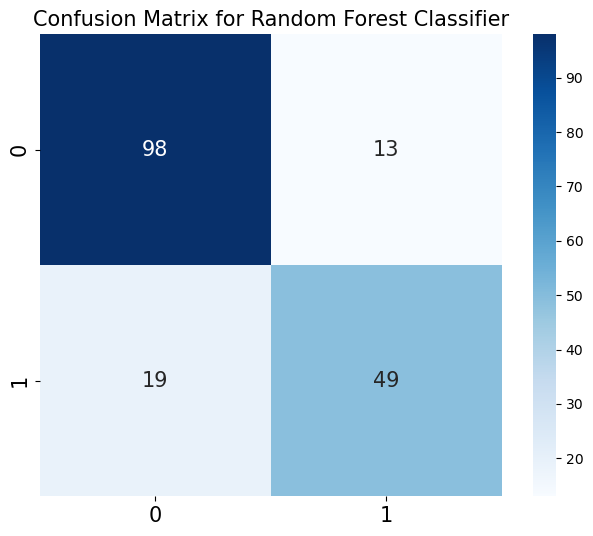

In [374]:
rfc=RandomForestClassifier()
rfc.fit(xf_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [375]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(xf_train)
x_test = sc.transform(x_test)

In [376]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [377]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
    

The accuracy of the Logistic Regression is: 83.24022346368714 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       111
           1       0.82      0.72      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



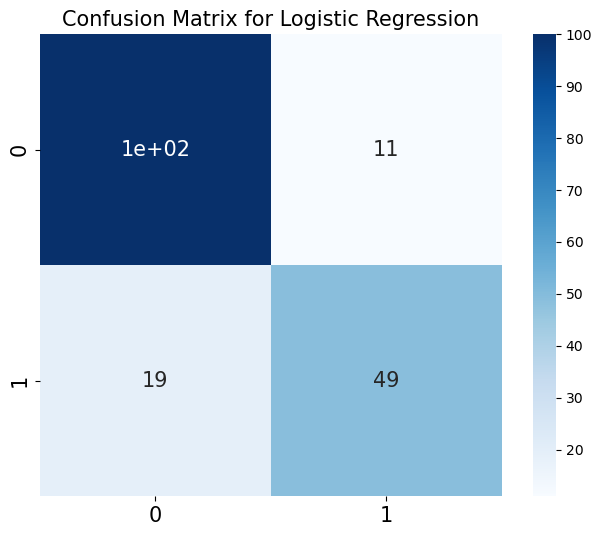

In [378]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

------------- 1 -------------------
[[94 17]
 [17 51]]  
Accuracy: 0.8100558659217877
------------- 2 -------------------
[[102   9]
 [ 26  42]]  
Accuracy: 0.8044692737430168
------------- 3 -------------------
[[100  11]
 [ 17  51]]  
Accuracy: 0.8435754189944135
------------- 4 -------------------
[[102   9]
 [ 22  46]]  
Accuracy: 0.8268156424581006
------------- 5 -------------------
[[101  10]
 [ 14  54]]  
Accuracy: 0.8659217877094972
------------- 6 -------------------
[[103   8]
 [ 18  50]]  
Accuracy: 0.8547486033519553
------------- 7 -------------------
[[101  10]
 [ 17  51]]  
Accuracy: 0.8491620111731844
------------- 8 -------------------
[[102   9]
 [ 17  51]]  
Accuracy: 0.8547486033519553
------------- 9 -------------------
[[100  11]
 [ 14  54]]  
Accuracy: 0.8603351955307262
------------- 10 -------------------
[[100  11]
 [ 18  50]]  
Accuracy: 0.8379888268156425
------------- 11 -------------------
[[99 12]
 [16 52]]  
Accuracy: 0.8435754189944135
------------- 12

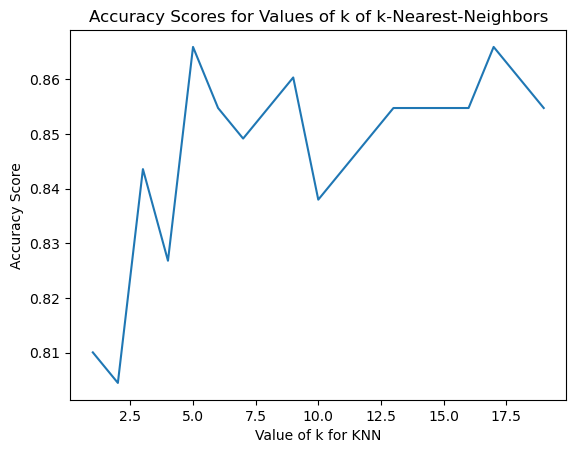

In [379]:

# Your code here:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#instead of k=3, I will try to see what is the optimal no. of k using k_range loop
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred),' \nAccuracy:', metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


In [380]:
# Your code here:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
scores.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred),' \nAccuracy:', metrics.accuracy_score(y_test, y_pred))


[[100  11]
 [ 17  51]]  
Accuracy: 0.8435754189944135


In [388]:
# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

for x in range(1,12):
    tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
    tree.fit(x_train,y_train)
    prediction=tree.predict(x_test)
    print("when depth = ", x, "\nThe accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

when depth =  1 
The accuracy of the Decision Tree is 0.793
when depth =  2 
The accuracy of the Decision Tree is 0.793
when depth =  3 
The accuracy of the Decision Tree is 0.793
when depth =  4 
The accuracy of the Decision Tree is 0.793
when depth =  5 
The accuracy of the Decision Tree is 0.793
when depth =  6 
The accuracy of the Decision Tree is 0.793
when depth =  7 
The accuracy of the Decision Tree is 0.793
when depth =  8 
The accuracy of the Decision Tree is 0.793
when depth =  9 
The accuracy of the Decision Tree is 0.793
when depth =  10 
The accuracy of the Decision Tree is 0.793
when depth =  11 
The accuracy of the Decision Tree is 0.793


In [383]:
Leo=[3, 8.0500, 1,1, 3 ]

In [384]:
leo = pd.DataFrame(Leo)

In [385]:
leo=leo.T

In [389]:
tree.predict(leo)

ValueError: X has 5 features, but DecisionTreeClassifier is expecting 10 features as input.

TPOT

In [391]:
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [392]:
from tpot import TPOTClassifier

In [393]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [394]:
pipeline_optimizer.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8187530779080074

Generation 2 - Current best internal CV score: 0.8229193341869399

Generation 3 - Current best internal CV score: 0.824386880724909

Generation 4 - Current best internal CV score: 0.8258051807347581

Generation 5 - Current best internal CV score: 0.8272136314389835

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.8, min_samples_leaf=8, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)